## Imports

In [27]:
%pylab inline 
import cv2
from IPython.display import clear_output
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [28]:
# Tracked color in HSV format
lower_red = (170, 100, 100)
upper_red = (180, 255, 255)

In [39]:
# Define the starting frame here
skip_to_frame = 1100
end_at_frame = 8000
display_video = False


In [40]:
# Analyzed file
video = cv2.VideoCapture('/home/kiview/Videos/GOPR0523.mp4')
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
length

10636

In [41]:
frame_number = 0

object_movement = []

while video.isOpened():
    frame_number += 1
    
    if frame_number % 100 == 0:
        print("Frame: " + str(frame_number))
        progress = int(frame_number / length * 100)
        print("Progress: " + str(progress) + "%")
        clear_output(wait=True)

    if frame_number < skip_to_frame:
        video.grab()
        continue
        
    if frame_number > end_at_frame:
        break

    ret, image = video.read()

    if ret:
        hsv_frame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        color_tracking_mask = cv2.inRange(hsv_frame, lower_red, upper_red)

        _, contours, _ = cv2.findContours(color_tracking_mask, cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_SIMPLE)

        # find biggest contour
        # biggest means max area
        if len(contours) > 0:
            tracked_object = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(tracked_object)
            object_movement.append((x, y))
            #print("x=" + str(x) + "; y=" + str(y))
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), thickness=3)
        
        if display_video:
            axis('off')
            title("Pigeons")
            imshow(image)
            show()
            clear_output(wait=True)


video.release()



Frame: 8000
Progress: 75%


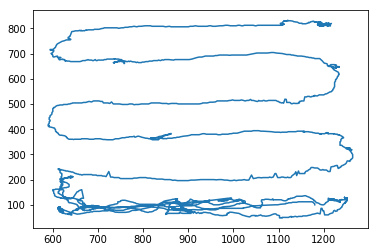

In [42]:
x = []; y=[]
for point in object_movement:
   x.append(point[0])
   y.append(point[1])
plt.plot(x,y)

#print(object_movement)